# Scikit-Learn Implementation

In [1]:
#Importing libraries
import os
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
df = pd.read_csv('intrusion_detection/data.csv')
target = df['xAttack']
data = df.drop('xAttack',axis=1)
data.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,25,193,441,0,0,0,0,0,0,...,15,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0
1,0,38,0,0,0,0,0,0,0,0,...,255,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0
2,0,25,167,9724,0,0,0,0,0,0,...,39,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
3,0,20,1339,0,0,0,0,0,0,0,...,134,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0
4,0,37,0,0,0,0,0,0,0,0,...,255,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0


In [3]:
scaler = StandardScaler()
scaler.fit(data)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
scaled_data = scaler.transform(data)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
x_pca = pca.transform(scaled_data)

In [9]:
scaled_data.shape

(24998, 29)

In [10]:
x_pca.shape

(24998, 2)

In [11]:
# plt.figure(figsize=(8,6))
# plt.scatter(x_pca[:,0],x_pca[:,1],c=df['xAttack'],cmap='plasma')
# plt.xlabel('First principal component')
# plt.ylabel('Second Principal Component')
pca.components_

array([[-3.72814350e-03,  1.65678879e-01, -1.47924260e-03,
        -1.10474258e-02, -1.70351943e-02, -3.08278809e-03,
        -4.40588146e-03, -4.47519167e-03, -8.74947209e-05,
        -1.06795049e-02,  2.36793693e-01, -5.47657606e-02,
         3.44659407e-01,  3.43489963e-01,  2.27905297e-02,
         2.23139478e-02, -3.52731913e-01,  1.07460517e-01,
        -1.41414404e-01,  2.26934469e-01, -2.89194093e-01,
        -3.29690228e-01,  8.21605750e-02, -1.21322159e-01,
        -1.15838121e-01,  3.46109137e-01,  3.45844765e-01,
         2.13515711e-02,  2.36264290e-02],
       [ 1.33277206e-01,  9.21663786e-02,  8.33108745e-03,
        -5.58619698e-03, -6.20087585e-03,  1.23773235e-02,
         6.18077202e-03,  6.16879032e-03,  4.02010871e-03,
         1.66269007e-03,  5.61431095e-02, -4.99255218e-02,
        -1.53554097e-01, -1.56678310e-01,  4.29465976e-01,
         4.29697760e-01, -6.62010836e-02,  1.76329850e-01,
        -3.40857081e-02,  2.89136950e-02, -1.30116495e-01,
        -1.28

## My Implementation

## Part - 1

In [12]:
df = pd.read_csv('intrusion_detection/data.csv')
df.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,dos


In [13]:
x = df.drop(['xAttack'], axis=1)
y = df['xAttack']
x = (x - x.mean()) / x.std()
x.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.114536,-0.425928,-0.010012,-0.034506,-0.090954,-0.026321,-0.021938,-0.021801,-0.027915,-0.044086,...,-1.690179,1.262846,1.067550,-0.441075,-0.253420,0.071029,-0.639487,-0.535321,-0.386069,-0.374975
1,-0.114536,0.362284,-0.010092,-0.039818,-0.090954,-0.026321,-0.021938,-0.021801,-0.027915,-0.044086,...,0.732932,-1.032492,-1.159522,-0.069608,-0.479712,-0.289000,-0.639487,-0.625133,2.878183,2.771083
2,-0.114536,-0.425928,-0.010023,0.077314,-0.090954,-0.026321,-0.021938,-0.021801,-0.027915,-0.044086,...,-1.447868,1.262846,1.067550,-0.441075,-0.382730,0.251043,-0.639487,-0.625133,-0.386069,-0.374975
3,-0.114536,-0.729086,-0.009539,-0.039818,-0.090954,-0.026321,-0.021938,-0.021801,-0.027915,-0.044086,...,-0.488720,-0.761389,-0.647295,-0.228808,0.263818,-0.289000,-0.594495,-0.625133,-0.386069,-0.374975
4,-0.114536,0.301652,-0.010092,-0.039818,-0.090954,-0.026321,-0.021938,-0.021801,-0.027915,-0.044086,...,0.732932,-0.815609,-0.936814,-0.175741,-0.479712,-0.289000,1.610076,1.620172,-0.386069,-0.374975


In [14]:
A = x
B = A.values
# print(B.shape)
V = np.cov(B.T)
# print(V.shape)
values, vectors = np.linalg.eig(V)
# print(values.shape,vectors.shape)
# print(vectors)
total = sum(values)
ind = -1
# print(total)
for i in range(0,len(values)+1):
    t = sum(values[:i])/total
    if t < 0.9:
        continue
    else:
        ind = i
        break
# print(index)
vectors = vectors[:ind]
print('The Reduced Dimension under 10% knee method : ' + str(vectors.shape[0]))
# print(B.shape)
# print(P.shape)
# print(P)

The Reduced Dimension under 10% knee method : 14


# Part - 2

## K - Means Clustering (K = 5)

In [15]:
np.set_printoptions(threshold=np.nan)
P = B.dot(vectors.T)
# P

In [16]:
k = int(input('enter number of clusters: ') )# number of clusters


enter number of clusters: 5


In [17]:
x_shape = P.shape[0]
x_shape
y_shape = P.shape[1]

In [18]:
c = P[np.random.randint(x_shape, size=k),:]

In [19]:
c.shape

(5, 14)

In [20]:
def random_centroids(X,k):
    """
    Randomly pick K points for our centroids, returns a matrix
    of shape K by N. Where each row represent a centroid.
    """
    return X[np.random.choice(X.shape[0], k), :]

In [21]:
centroids_test = random_centroids(P,k)
print(centroids_test)

[[ 0.04400622 -0.25921523  0.08233543 -0.63290608  0.13229344 -0.13875971
  -0.64495981  0.25646211  0.00777651  0.5515038  -1.39625857  1.29288542
  -0.23927933  0.43286297]
 [ 1.44677404  0.93557569 -0.08276195 -0.54841384  0.72599783 -0.16939499
  -0.54247224  0.33303145 -0.29969265  0.1240738  -0.75602372  1.93117456
   1.33790078 -1.16488268]
 [ 1.41479213  0.93199861 -0.08618562 -0.54996074  0.72347704 -0.18116683
  -0.53991626  0.33249161 -0.30109022  0.12045709 -0.99789437  2.13762738
   1.1554755  -1.21505965]
 [ 1.86357355  1.25380178 -0.22475198  0.26431492  0.67750853 -0.26108897
   0.05382271  0.91219566 -0.34469734 -1.34711521  1.68099159 -0.17576643
   1.08657081 -1.39707165]
 [-0.77289147  0.51230908  0.10025173 -0.62680259  0.35739112  0.31656704
  -0.42474783  0.39797778  0.20062123  0.28955803 -1.45433365  0.72539993
  -2.31490585 -1.40703262]]


In [22]:
def closest_centroids(X,centroids):
    
    """
    Calculate the closest centroid for each point by calculating
    the euclidian distance and return a label for each centroid
    """
    distance = np.array([ np.sum((X-centroid)**2,axis=1) for centroid in centroids ])
#     print(distance)
    return distance.argmin(axis=0)

In [23]:
# print(closest_centroids(P,centroids_test))

In [24]:
def calc_new_centroids(X,labels,k):
    """
    Calculates the new centroids.
    """
    return np.array([ X[labels == k ].mean(axis=0) for k in range(k)])

In [25]:
def should_stop(old_centroids,new_centroids,current_iter,max_iters = 10):
    
    if current_iter > max_iters: return False
    return (old_centroids == new_centroids).all()

In [26]:
def kmeans(X,k,max_iters =100):
    
    centroids = random_centroids(X,k)
    labels = old_centroids = None
    iteration = 1
    
    while not should_stop(old_centroids,centroids,iteration,max_iters):
        labels = closest_centroids(X,centroids)
#         print(labels)
        old_centroids = centroids
        centroids = calc_new_centroids(X,labels,k)
        iteration += 1
    return centroids, labels

In [27]:
# k = 3
centroids,labels = kmeans(P,k)
print(labels.shape)
# for i,color in zip(range(k),['r','b','g','y','m']):
#     d = P[labels == i]
# #     print(d)
#     plt.scatter(d[:,0],d[:,1],color= color)

(24998,)


Purity is : 0.851548123849908


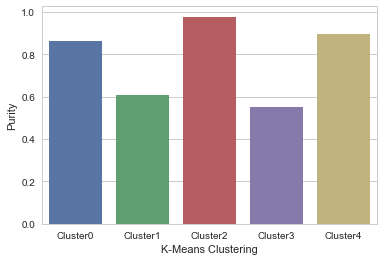

In [43]:
c_label = labels
c_mat = np.zeros((5,5))
c_mat = c_mat.astype(int)
x_val = []
y_val = []
cleanup_nums = {"xAttack":{"normal": 0, "dos": 2, "probe": 3, "r2l" : 4, "u2r": 1}}
new_df = pd.read_csv('intrusion_detection/data.csv')
new_df.replace(cleanup_nums, inplace=True)
new_df.head()
actual_labels = np.array(new_df['xAttack'])
# print(actual_labels)
for i in range(len(c_label)):
    x = c_label[i]
#     print (actual_labels[i])
    c_mat[x,actual_labels[i]] += 1

temp = np.amax(c_mat,axis=1)
# print(c_mat)
cluster_size = c_mat.sum(axis=1)
# print(cluster_size)
# print(temp)
purity = float(np.sum(temp))/len(c_label)
print('Purity is : ' + str(purity))
actual_labels = np.array(target)
# print('Purity :' + str(totalPurity))
for i in range(len(cluster_size)):
    cluster_purity = temp[i]/cluster_size[i]
    x_val.append('Cluster' + str(i))
    y_val.append(cluster_purity)

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x_val,y_val)
ax.set(xlabel ='K-Means Clustering', ylabel ='Purity') 
plt.show()

In [29]:
from sklearn.cluster import KMeans

In [30]:
k = 5
#Sklearn version
kmeans_sk = KMeans(5,init='random')
kmeans_sk.fit(P)
pred_sk = kmeans_sk.predict(P)
#Our pred
centroids,pred_me = kmeans(P,k)

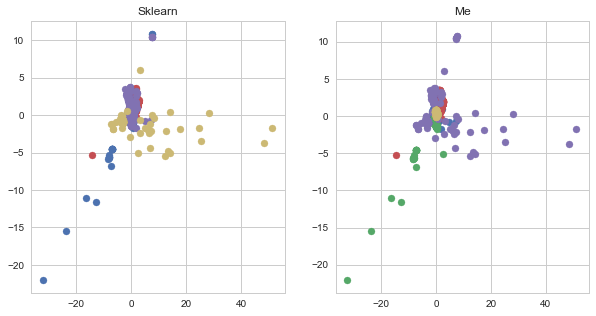

In [31]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10,5)

for i,(title,pred) in enumerate(zip(["Sklearn","Me"],[pred_sk,pred_me])):
    for j in range(k):
        axes[i].scatter(P[pred == j,0],P[pred == j,1])
    axes[i].set_title(title)

# Part - 3

## GMM

In [32]:
from sklearn import mixture
g = mixture.GaussianMixture(n_components=5)
g.fit(P)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Purity is : 0.8346267701416114


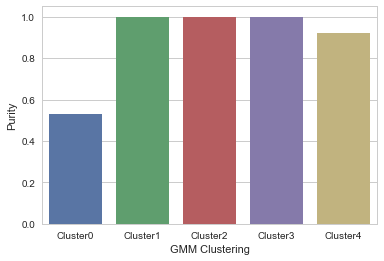

In [42]:
c_label = g.predict(P)
c_mat = np.zeros((5,5))
c_mat = c_mat.astype(int)
x_val = []
y_val = []
cleanup_nums = {"xAttack":{"normal": 0, "dos": 2, "probe": 3, "r2l" : 4, "u2r": 1}}
new_df = pd.read_csv('intrusion_detection/data.csv')
new_df.replace(cleanup_nums, inplace=True)
new_df.head()
actual_labels = np.array(new_df['xAttack'])
# print(actual_labels)
for i in range(len(c_label)):
    x = c_label[i]
#     print (actual_labels[i])
    c_mat[x,actual_labels[i]] += 1

temp = np.amax(c_mat,axis=1)
# print(c_mat)
cluster_size = c_mat.sum(axis=1)
# print(cluster_size)
# print(temp)
purity = float(np.sum(temp))/len(c_label)
print('Purity is : ' + str(purity))
actual_labels = np.array(target)
# print('Purity :' + str(totalPurity))
for i in range(len(cluster_size)):
    cluster_purity = temp[i]/cluster_size[i]
    x_val.append('Cluster' + str(i))
    y_val.append(cluster_purity)

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x_val,y_val)
ax.set(xlabel ='GMM Clustering', ylabel ='Purity') 
plt.show()

## Part - 4

## Hierarchical Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
singleCluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage="single")

In [36]:
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
single_pred = singleCluster.fit_predict(P)

In [37]:
print(single_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Purity is : 0.5346427714217138


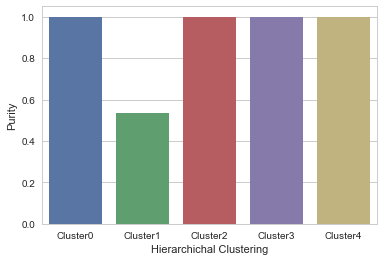

In [41]:
c_label = single_pred
c_mat = np.zeros((5,5))
c_mat = c_mat.astype(int)
x_val = []
y_val = []
cleanup_nums = {"xAttack":{"normal": 0, "dos": 2, "probe": 3, "r2l" : 4, "u2r": 1}}
new_df = pd.read_csv('intrusion_detection/data.csv')
new_df.replace(cleanup_nums, inplace=True)
new_df.head()
actual_labels = np.array(new_df['xAttack'])
# print(actual_labels)
for i in range(len(c_label)):
    x = c_label[i]
#     print (actual_labels[i])
    c_mat[x,actual_labels[i]] += 1

temp = np.amax(c_mat,axis=1)
# print(c_mat)
cluster_size = c_mat.sum(axis=1)
# print(cluster_size)
# print(temp)
purity = float(np.sum(temp))/len(c_label)
print('Purity is : ' + str(purity))
actual_labels = np.array(target)
# print('Purity :' + str(totalPurity))
for i in range(len(cluster_size)):
    cluster_purity = temp[i]/cluster_size[i]
    x_val.append('Cluster' + str(i))
    y_val.append(cluster_purity)

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x_val,y_val)
ax.set(xlabel ='Hierarchichal Clustering', ylabel ='Purity') 
plt.show()

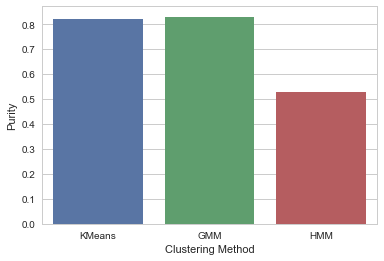

In [40]:
import seaborn as sns
x_val = ["KMeans","GMM","HMM"]
KM_Purity = 0.82
GMM_Purity = 0.83
HMM_Purity = 0.53
y_val = [KM_Purity,GMM_Purity,HMM_Purity]
sns.set(style="whitegrid")
ax = sns.barplot(x_val,y_val)
ax.set(xlabel ='Clustering Method', ylabel ='Purity') 
plt.show()

# Part - 5

Though PCA can be used on categorical data if categorical variables are zero-one, a log-shaped function would sure perform better than the linear one that PCA uses,but it is recommended to be use correspondence analysis(multiple).This is similar in theory to PCA, but it works on contingency tables between categorical variables. It's most useful for visualizing closely related buckets between 2 or more variables with lots of different categories, but can also be used for projecting those categorical variables into low dimensional space. Technique was conceived for 2 categorical variables, but has been generalized to work for multiple variables. 